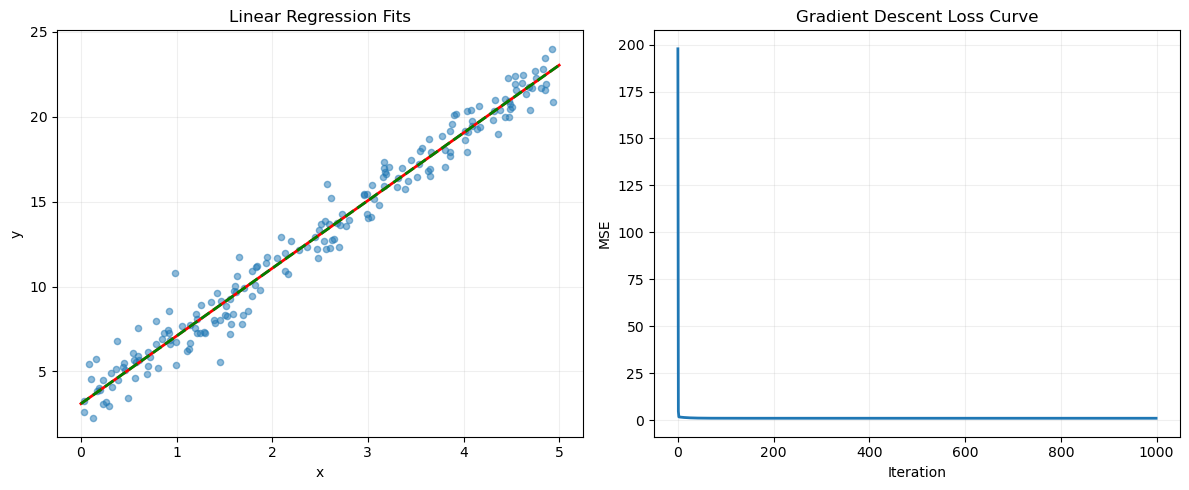

Closed-form: 3.1052011509608164 3.984385786365012
Gradient Descent: 3.1052011509363893 3.9843857863726124


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 200
x = np.random.uniform(0, 5, n_samples)
noise = np.random.normal(0, 1, n_samples)
y = 3 + 4 * x + noise
X = np.column_stack((np.ones(n_samples), x))

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
theta_closed = XtX_inv @ (X.T @ y)
intercept_closed, slope_closed = theta_closed

def gradient_descent(X, y, lr=0.05, n_iter=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    loss_history = []
    for _ in range(n_iter):
        preds = X @ theta
        residuals = preds - y
        mse = np.mean(residuals ** 2)
        loss_history.append(mse)
        grad = (2.0 / m) * (X.T @ residuals)
        theta -= lr * grad
    return theta, np.array(loss_history)

theta_gd, loss_curve = gradient_descent(X, y, lr=0.05, n_iter=1000)
intercept_gd, slope_gd = theta_gd

x_plot = np.linspace(0, 5, 200)
y_closed_plot = intercept_closed + slope_closed * x_plot
y_gd_plot = intercept_gd + slope_gd * x_plot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5, s=20)
plt.plot(x_plot, y_closed_plot, 'r-', linewidth=2)
plt.plot(x_plot, y_gd_plot, 'g--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fits')
plt.grid(alpha=0.2)
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(loss_curve)), loss_curve, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Gradient Descent Loss Curve')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("Closed-form:", intercept_closed, slope_closed)
print("Gradient Descent:", intercept_gd, slope_gd)

